In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sale_price = pd.read_csv('data/Sale_Prices_Zip.csv')
sale_count = pd.read_csv('data/Sale_Counts_Zip.csv')
turnover = pd.read_csv('data/MonthlyTurnover_Zip.csv')
pct_reduced = pd.read_csv('data/Zip_PctOfListingsWithPriceReductions_AllHomes.csv')
rent = pd.read_csv('data/Zip_Zri_AllHomes.csv')
price_to_rent = pd.read_csv('data/Zip_PriceToRentRatio_AllHomes.csv')
value = pd.read_csv('data/Zip_Zhvi_AllHomes.csv')

In [26]:
####Standarize states when necessary - from full names to 2 letter abbrevs. Change "StateNames" column headers to "State"

state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


sale_price['StateName'].replace(state_abbrev, inplace=True)
sale_price.rename(columns={'StateName':'State'}, inplace=True)

sale_count['StateName'].replace(state_abbrev, inplace=True)
sale_count.rename(columns={'StateName':'State'}, inplace=True)

turnover['StateName'].replace(state_abbrev, inplace=True)
turnover.rename(columns={'StateName':'State'}, inplace=True)

In [27]:
####Prep data frames to be merged for analysis and modeling: find annual averages, annual avg growth 
####rates, 3 year avg yoy growth rates

In [28]:
####sale_price

sale_price['sale_price_avg_201309_201408'] = sale_price.loc[:, '2013-09':'2014-08'].mean(axis=1)
sale_price['sale_price_avg_201409_201508'] = sale_price.loc[:, '2014-09':'2015-08'].mean(axis=1)
sale_price['sale_price_avg_201509_201608'] = sale_price.loc[:, '2015-09':'2016-08'].mean(axis=1)
sale_price['sale_price_avg_201609_201708'] = sale_price.loc[:, '2016-09':'2017-08'].mean(axis=1)

sale_price['sale_price_yoy_gr_2013_2015'] = (sale_price.sale_price_avg_201409_201508 - sale_price.sale_price_avg_201309_201408) / sale_price.sale_price_avg_201309_201408
sale_price['sale_price_yoy_gr_2014_2016'] = (sale_price.sale_price_avg_201509_201608 - sale_price.sale_price_avg_201409_201508) / sale_price.sale_price_avg_201409_201508
sale_price['sale_price_yoy_gr_2015_2017'] = (sale_price.sale_price_avg_201609_201708 - sale_price.sale_price_avg_201509_201608) / sale_price.sale_price_avg_201509_201608

sale_price['sale_price_3yravg_yoy_gr_2013_2017'] = (sale_price.sale_price_yoy_gr_2013_2015 + sale_price.sale_price_yoy_gr_2014_2016 + sale_price.sale_price_yoy_gr_2015_2017) / 3

In [29]:
####sale_count

sale_count['sale_count_avg_201309_201408'] = sale_count.loc[:, '2013-09':'2014-08'].mean(axis=1)
sale_count['sale_count_avg_201409_201508'] = sale_count.loc[:, '2014-09':'2015-08'].mean(axis=1)
sale_count['sale_count_avg_201509_201608'] = sale_count.loc[:, '2015-09':'2016-08'].mean(axis=1)
sale_count['sale_count_avg_201609_201708'] = sale_count.loc[:, '2016-09':'2017-08'].mean(axis=1)

sale_count['sale_count_yoy_gr_2013_2015'] = (sale_count.sale_count_avg_201409_201508 - sale_count.sale_count_avg_201309_201408) / sale_count.sale_count_avg_201309_201408
sale_count['sale_count_yoy_gr_2014_2016'] = (sale_count.sale_count_avg_201509_201608 - sale_count.sale_count_avg_201409_201508) / sale_count.sale_count_avg_201409_201508
sale_count['sale_count_yoy_gr_2015_2017'] = (sale_count.sale_count_avg_201609_201708 - sale_count.sale_count_avg_201509_201608) / sale_count.sale_count_avg_201509_201608

sale_count['sale_count_3yravg_yoy_gr_2013_2017'] = (sale_count.sale_count_yoy_gr_2013_2015 + sale_count.sale_count_yoy_gr_2014_2016 + sale_count.sale_count_yoy_gr_2015_2017) / 3

In [30]:
####turnover

turnover['turnover_avg_201309_201408'] = turnover.loc[:, '2013-09':'2014-08'].mean(axis=1)
turnover['turnover_avg_201409_201508'] = turnover.loc[:, '2014-09':'2015-08'].mean(axis=1)
turnover['turnover_avg_201509_201608'] = turnover.loc[:, '2015-09':'2016-08'].mean(axis=1)
turnover['turnover_avg_201609_201708'] = turnover.loc[:, '2016-09':'2017-08'].mean(axis=1)

turnover['turnover_yoy_gr_2013_2015'] = (turnover.turnover_avg_201409_201508 - turnover.turnover_avg_201309_201408) / turnover.turnover_avg_201309_201408
turnover['turnover_yoy_gr_2014_2016'] = (turnover.turnover_avg_201509_201608 - turnover.turnover_avg_201409_201508) / turnover.turnover_avg_201409_201508
turnover['turnover_yoy_gr_2015_2017'] = (turnover.turnover_avg_201609_201708 - turnover.turnover_avg_201509_201608) / turnover.turnover_avg_201509_201608

turnover['turnover_3yravg_yoy_gr_2013_2017'] = (turnover.turnover_yoy_gr_2013_2015 + turnover.turnover_yoy_gr_2014_2016 + turnover.turnover_yoy_gr_2015_2017) / 3

In [31]:
####pct_reduced

pct_reduced['pct_reduced_avg_201309_201408'] = pct_reduced.loc[:, '2013-09':'2014-08'].mean(axis=1)
pct_reduced['pct_reduced_avg_201409_201508'] = pct_reduced.loc[:, '2014-09':'2015-08'].mean(axis=1)
pct_reduced['pct_reduced_avg_201509_201608'] = pct_reduced.loc[:, '2015-09':'2016-08'].mean(axis=1)
pct_reduced['pct_reduced_avg_201609_201708'] = pct_reduced.loc[:, '2016-09':'2017-08'].mean(axis=1)

pct_reduced['pct_reduced_yoy_gr_2013_2015'] = (pct_reduced.pct_reduced_avg_201409_201508 - pct_reduced.pct_reduced_avg_201309_201408) / pct_reduced.pct_reduced_avg_201309_201408
pct_reduced['pct_reduced_yoy_gr_2014_2016'] = (pct_reduced.pct_reduced_avg_201509_201608 - pct_reduced.pct_reduced_avg_201409_201508) / pct_reduced.pct_reduced_avg_201409_201508
pct_reduced['pct_reduced_yoy_gr_2015_2017'] = (pct_reduced.pct_reduced_avg_201609_201708 - pct_reduced.pct_reduced_avg_201509_201608) / pct_reduced.pct_reduced_avg_201509_201608

pct_reduced['pct_reduced_3yravg_yoy_gr_2013_2017'] = (pct_reduced.pct_reduced_yoy_gr_2013_2015 + pct_reduced.pct_reduced_yoy_gr_2014_2016 + pct_reduced.pct_reduced_yoy_gr_2015_2017) / 3

In [32]:
####rent

rent['rent_avg_201309_201408'] = rent.loc[:, '2013-09':'2014-08'].mean(axis=1)
rent['rent_avg_201409_201508'] = rent.loc[:, '2014-09':'2015-08'].mean(axis=1)
rent['rent_avg_201509_201608'] = rent.loc[:, '2015-09':'2016-08'].mean(axis=1)
rent['rent_avg_201609_201708'] = rent.loc[:, '2016-09':'2017-08'].mean(axis=1)

rent['rent_yoy_gr_2013_2015'] = (rent.rent_avg_201409_201508 - rent.rent_avg_201309_201408) / rent.rent_avg_201309_201408
rent['rent_yoy_gr_2014_2016'] = (rent.rent_avg_201509_201608 - rent.rent_avg_201409_201508) / rent.rent_avg_201409_201508
rent['rent_yoy_gr_2015_2017'] = (rent.rent_avg_201609_201708 - rent.rent_avg_201509_201608) / rent.rent_avg_201509_201608

rent['rent_3yravg_yoy_gr_2013_2017'] = (rent.rent_yoy_gr_2013_2015 + rent.rent_yoy_gr_2014_2016 + rent.rent_yoy_gr_2015_2017) / 3

In [33]:
####cut down GR dataframes to columns: RegionID, yoy_gr_2015_2017, and 3yravg_yoy_gr_2013_2017

sale_price = sale_price[['RegionID', 'sale_price_yoy_gr_2015_2017', 'sale_price_3yravg_yoy_gr_2013_2017']]
sale_count = sale_count[['RegionID', 'sale_count_yoy_gr_2015_2017', 'sale_count_3yravg_yoy_gr_2013_2017']]
turnover = turnover[['RegionID', 'turnover_yoy_gr_2015_2017', 'turnover_3yravg_yoy_gr_2013_2017']]
pct_reduced = pct_reduced[['RegionID', 'pct_reduced_yoy_gr_2015_2017', 'pct_reduced_3yravg_yoy_gr_2013_2017']]
rent = rent[['RegionID', 'rent_yoy_gr_2015_2017', 'rent_3yravg_yoy_gr_2013_2017']]

In [34]:
####price_to_rent dataframe: only need to find 1yr avg and 3yr avg

price_to_rent['price_to_rent_avg_201409_201508'] = price_to_rent.loc[:, '2014-09':'2015-08'].mean(axis=1)
price_to_rent['price_to_rent_avg_201509_201608'] = price_to_rent.loc[:, '2015-09':'2016-08'].mean(axis=1)
price_to_rent['price_to_rent_avg_201609_201708'] = price_to_rent.loc[:, '2016-09':'2017-08'].mean(axis=1)

price_to_rent['price_to_rent_3yravg_2014_2017'] = (price_to_rent.price_to_rent_avg_201409_201508 + price_to_rent.price_to_rent_avg_201509_201608 + price_to_rent.price_to_rent_avg_201609_201708) / 3

In [35]:
####cut down price_to_rent dataframe to columns: RegionID, RegionName, State, SizeRank, price_to_rent_avg_201609_201708,
####price_to_rent_3yravg_2014_2017. This is the largest dataframe so it is first and contains all of the other columns

price_to_rent = price_to_rent[['RegionID', 'RegionName', 'State', 'SizeRank', 'price_to_rent_avg_201609_201708', 'price_to_rent_3yravg_2014_2017']]

In [37]:
####value: only need current term GR, this is what I am trying to predict

value['value_avg_201609_201708'] = value.loc[:, '2016-09':'2017-08'].mean(axis=1)
value['value_avg_201709_201808'] = value.loc[:, '2017-09':'2018-08'].mean(axis=1)

value['value_yoy_gr_2016_2018'] = (value.value_avg_201709_201808 - value.value_avg_201609_201708) / value.value_avg_201609_201708

In [38]:
####cut down value GR dataframe to columns: RegionID, value_yoy_gr_2016_2018, this is y

value = value[['RegionID', 'value_yoy_gr_2016_2018']]

In [39]:
####Join all on RegionID

zillow = price_to_rent.merge(value, on='RegionID', how='inner').merge(rent, on='RegionID', how='inner').merge(sale_count, on='RegionID', how='inner').merge(turnover, on='RegionID', how='inner').merge(pct_reduced, on='RegionID', how='inner').merge(sale_price, on='RegionID', how='inner')

In [42]:
zillow.info()

zillow.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 3438
Data columns (total 17 columns):
RegionID                               3439 non-null int64
RegionName                             3439 non-null int64
State                                  3439 non-null object
SizeRank                               3439 non-null int64
price_to_rent_avg_201609_201708        3439 non-null float64
price_to_rent_3yravg_2014_2017         3435 non-null float64
value_yoy_gr_2016_2018                 3439 non-null float64
rent_yoy_gr_2015_2017                  3439 non-null float64
rent_3yravg_yoy_gr_2013_2017           3438 non-null float64
sale_count_yoy_gr_2015_2017            3439 non-null float64
sale_count_3yravg_yoy_gr_2013_2017     3302 non-null float64
turnover_yoy_gr_2015_2017              3415 non-null float64
turnover_3yravg_yoy_gr_2013_2017       1662 non-null float64
pct_reduced_yoy_gr_2015_2017           3439 non-null float64
pct_reduced_3yravg_yoy_gr_2013_2017    3439 no

RegionID                                  0
RegionName                                0
State                                     0
SizeRank                                  0
price_to_rent_avg_201609_201708           0
price_to_rent_3yravg_2014_2017            4
value_yoy_gr_2016_2018                    0
rent_yoy_gr_2015_2017                     0
rent_3yravg_yoy_gr_2013_2017              1
sale_count_yoy_gr_2015_2017               0
sale_count_3yravg_yoy_gr_2013_2017      137
turnover_yoy_gr_2015_2017                24
turnover_3yravg_yoy_gr_2013_2017       1777
pct_reduced_yoy_gr_2015_2017              0
pct_reduced_3yravg_yoy_gr_2013_2017       0
sale_price_yoy_gr_2015_2017               0
sale_price_3yravg_yoy_gr_2013_2017      773
dtype: int64

In [43]:
zillow.shape

(3439, 17)

In [44]:
####ptrg: price_to_rent needs to be joined with rent on RegionID to determine the 1yr and 3yr ptrg 
####ratios ('Price to Rental Growth').
####the ptrg_1yr is found by dividing price_to_rent_avg_201609_201708 by (rent_yoy_gr_2015_2017 * 100)
####the ptrg_3yr is found by dividing price_to_rent_avg_201609_201708 by (rent_3yravg_yoy_gr_2013_2017 * 100)

zillow['ptrg_1yr_201609_201708'] = zillow.price_to_rent_avg_201609_201708 / (zillow.rent_yoy_gr_2015_2017 * 100)
zillow['ptrg_3yr_2013_2017'] = zillow.price_to_rent_avg_201609_201708 / (zillow.rent_3yravg_yoy_gr_2013_2017 * 100)

In [45]:
zillow.shape

(3439, 19)

In [46]:
zillow = zillow.dropna()

In [47]:
zillow.shape

(1274, 19)

In [48]:
zillow.info()

zillow.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 3437
Data columns (total 19 columns):
RegionID                               1274 non-null int64
RegionName                             1274 non-null int64
State                                  1274 non-null object
SizeRank                               1274 non-null int64
price_to_rent_avg_201609_201708        1274 non-null float64
price_to_rent_3yravg_2014_2017         1274 non-null float64
value_yoy_gr_2016_2018                 1274 non-null float64
rent_yoy_gr_2015_2017                  1274 non-null float64
rent_3yravg_yoy_gr_2013_2017           1274 non-null float64
sale_count_yoy_gr_2015_2017            1274 non-null float64
sale_count_3yravg_yoy_gr_2013_2017     1274 non-null float64
turnover_yoy_gr_2015_2017              1274 non-null float64
turnover_3yravg_yoy_gr_2013_2017       1274 non-null float64
pct_reduced_yoy_gr_2015_2017           1274 non-null float64
pct_reduced_3yravg_yoy_gr_2013_2017    1274 no

RegionID                               0
RegionName                             0
State                                  0
SizeRank                               0
price_to_rent_avg_201609_201708        0
price_to_rent_3yravg_2014_2017         0
value_yoy_gr_2016_2018                 0
rent_yoy_gr_2015_2017                  0
rent_3yravg_yoy_gr_2013_2017           0
sale_count_yoy_gr_2015_2017            0
sale_count_3yravg_yoy_gr_2013_2017     0
turnover_yoy_gr_2015_2017              0
turnover_3yravg_yoy_gr_2013_2017       0
pct_reduced_yoy_gr_2015_2017           0
pct_reduced_3yravg_yoy_gr_2013_2017    0
sale_price_yoy_gr_2015_2017            0
sale_price_3yravg_yoy_gr_2013_2017     0
ptrg_1yr_201609_201708                 0
ptrg_3yr_2013_2017                     0
dtype: int64

In [49]:
zillow.to_csv('data/zillow_201808.csv', index = False)

In [50]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,1274.0,89648.821036,54266.650463,59003.000000,72586.750000,79166.500000,91905.000000,738092.000000
RegionName,1274.0,54119.008634,25286.364404,3038.000000,33415.750000,48306.500000,76228.500000,99223.000000
SizeRank,1274.0,3286.623234,2221.743435,2.000000,1409.250000,3035.500000,4825.250000,9878.000000
price_to_rent_avg_201609_201708,1274.0,12.340211,3.066059,4.560833,10.410417,11.775417,13.578542,34.239167
price_to_rent_3yravg_2014_2017,1274.0,11.826175,2.928155,4.403333,9.953681,11.294306,13.143472,32.072222
value_yoy_gr_2016_2018,1274.0,0.075703,0.042968,-0.047638,0.048132,0.071501,0.099326,0.326137
rent_yoy_gr_2015_2017,1274.0,0.026028,0.030755,-0.075833,0.007289,0.027564,0.045398,0.148240
rent_3yravg_yoy_gr_2013_2017,1274.0,0.039065,0.025684,-0.036643,0.022756,0.036435,0.052224,0.202814
sale_count_yoy_gr_2015_2017,1274.0,0.042018,0.124327,-0.365325,-0.025666,0.039798,0.106397,0.735931
sale_count_3yravg_yoy_gr_2013_2017,1274.0,0.082733,0.069020,-0.188168,0.039569,0.079063,0.121629,0.585137


In [51]:
zillow.corr().value_yoy_gr_2016_2018.sort_values()

pct_reduced_3yravg_yoy_gr_2013_2017   -0.343028
pct_reduced_yoy_gr_2015_2017          -0.105820
ptrg_1yr_201609_201708                -0.052624
SizeRank                              -0.049615
RegionID                              -0.025382
price_to_rent_3yravg_2014_2017        -0.023815
ptrg_3yr_2013_2017                    -0.009660
sale_count_3yravg_yoy_gr_2013_2017     0.015202
price_to_rent_avg_201609_201708        0.016458
sale_count_yoy_gr_2015_2017            0.044811
turnover_3yravg_yoy_gr_2013_2017       0.063285
turnover_yoy_gr_2015_2017              0.067206
RegionName                             0.078757
rent_3yravg_yoy_gr_2013_2017           0.302601
rent_yoy_gr_2015_2017                  0.372369
sale_price_yoy_gr_2015_2017            0.510070
sale_price_3yravg_yoy_gr_2013_2017     0.555317
value_yoy_gr_2016_2018                 1.000000
Name: value_yoy_gr_2016_2018, dtype: float64

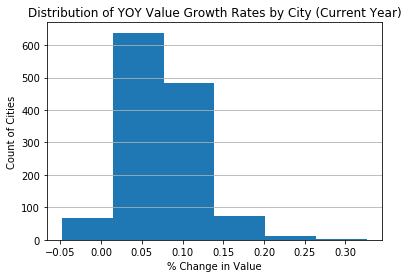

In [52]:
plt.hist(zillow.value_yoy_gr_2016_2018, bins=6);
plt.xlabel('% Change in Value')
plt.ylabel('Count of Cities')
plt.title('Distribution of YOY Value Growth Rates by City (Current Year)')
ax = plt.gca()
ax.grid(which='major', axis='y');

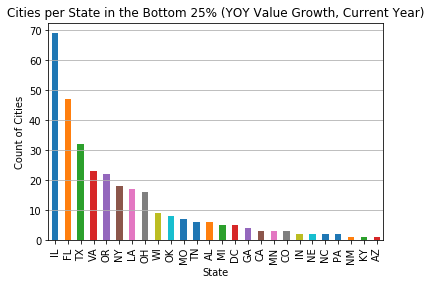

In [53]:
# States with Cities in the Bottom 25% (YOY Value Growth, Current Year)
zillow[zillow.value_yoy_gr_2016_2018 <= 0.047848].State.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('State')
plt.ylabel('Count of Cities')
plt.title('Cities per State in the Bottom 25% (YOY Value Growth, Current Year)')
ax = plt.gca()
ax.grid(which='major', axis='y');

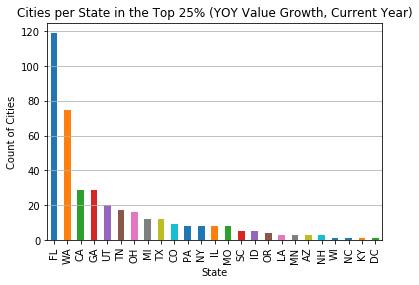

In [54]:
# States with Cities in the Top 25% (YOY Value Growth, Current Year)
zillow[zillow.value_yoy_gr_2016_2018 >= 0.090575].State.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('State')
plt.ylabel('Count of Cities')
plt.title('Cities per State in the Top 25% (YOY Value Growth, Current Year)')
ax = plt.gca()
ax.grid(which='major', axis='y');

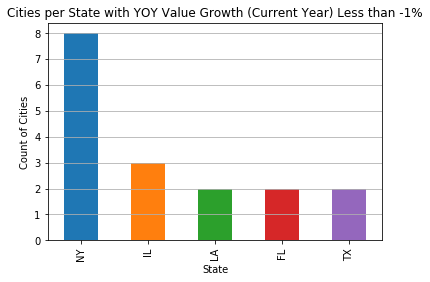

In [55]:
# States with Cities YOY Value Growth, Current Year Less than -1%
zillow[zillow.value_yoy_gr_2016_2018 < -.01].State.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('State')
plt.ylabel('Count of Cities')
plt.title('Cities per State with YOY Value Growth (Current Year) Less than -1%')
ax = plt.gca()
ax.grid(which='major', axis='y');

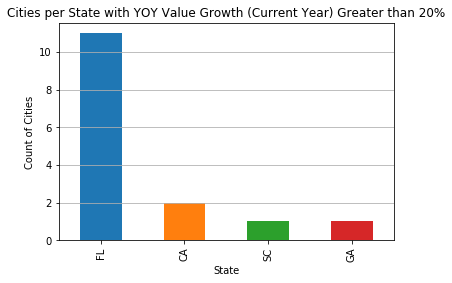

In [56]:
# States with Cities YOY Value Growth, Current Year Greater than 20%
zillow[zillow.value_yoy_gr_2016_2018 > .2].State.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('State')
plt.ylabel('Count of Cities')
plt.title('Cities per State with YOY Value Growth (Current Year) Greater than 20%')
ax = plt.gca()
ax.grid(which='major', axis='y');